In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import dask
import xarray as xr
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Define the path 
zarr_path = '/projects/pdirmeye/FLUXCOM/xBase/'

# Open the dataset
ds = xr.open_zarr(zarr_path).sel(time=slice('2001', '2004'))
ds

<xarray.Dataset>
Dimensions:   (time: 1461, lat: 3600, lon: 7200)
Coordinates:
  * lat       (lat) float64 89.97 89.92 89.88 89.83 ... -89.88 -89.92 -89.97
  * lon       (lon) float64 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
  * time      (time) datetime64[ns] 2001-01-01T12:00:00 ... 2004-12-31T12:00:00
Data variables:
    ET_daily  (time, lat, lon) float32 dask.array<chunksize=(1461, 40, 40), meta=np.ndarray>

In [4]:
# Loading Nino3.4
file_nino34 = '/home/pdirmeye/classes/clim680_2022/nino34_1982-2019.oisstv2_anoms.nc'
ds_indices = xr.open_dataset(file_nino34).sel(time=slice('2001', '2004' ))
ds_indices

<xarray.Dataset>
Dimensions:  (time: 48)
Coordinates:
  * time     (time) datetime64[ns] 2001-01-01 2001-02-01 ... 2004-12-01
    month    (time) int64 ...
Data variables:
    sst      (time) float32 ...

In [5]:
# Load SOLAR indices 
file='/home/tsany/clim680_dataset/solar.data'
index_name='solar'

df_sol=pd.read_table(file,skiprows=1,header=None,delim_whitespace=True,index_col=0,parse_dates=True,na_values=['-99.9','-99.90'])
df_sol.drop(df_sol.tail(9).index,inplace=True)
df_sol

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
1948,1557,1343,1355,2081.0,2265.0,1955.0,1828.0,1728.0,1637.0,1591.0,1654.0,1933.0
1949,1835,2202,2039,1825.0,1549.0,1575.0,1599.0,1752.0,1725.0,1782.0,1804.0,1652.0
1950,1507,1433,1378,1643.0,1571.0,1287.0,1341.0,1209.0,986.0,999.0,1019.0,1011.0
1951,1079,1019,1025,1271.0,1686.0,1617.0,1163.0,1098.0,1178.0,1060.0,1044.0,1024.0
1952,954,862,785,840.0,809.0,848.0,888.0,933.0,815.0,828.0,834.0,857.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018,700,720,684,700.0,709.0,725.0,697.0,691.0,683.0,695.0,689.0,700.0
2019,716,706,715,725.0,713.0,681.0,673.0,671.0,680.0,675.0,702.0,709.0
2020,723,709,702,696.0,692.0,697.0,695.0,717.0,706.0,746.0,901.0,873.0


In [6]:
start_date=str(df_sol.index[0])+'-'+str(df_sol.columns[0])+'-01'
end_date=str(df_sol.index[-1])+'-'+str(df_sol.columns[-1])+'-01'

dates=pd.date_range(start=start_date,end=end_date,freq='MS')
dates

DatetimeIndex(['1948-01-01', '1948-02-01', '1948-03-01', '1948-04-01',
               '1948-05-01', '1948-06-01', '1948-07-01', '1948-08-01',
               '1948-09-01', '1948-10-01',
               ...
               '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01',
               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01',
               '2022-11-01', '2022-12-01'],
              dtype='datetime64[ns]', length=900, freq='MS')

In [7]:
sol_clim_index=df_sol.T.unstack().values
sol_clim_index=sol_clim_index.astype('float32')

In [8]:
ds_indices_sol=xr.DataArray(sol_clim_index, coords={'time':dates}, dims=['time'])        
ds_indices_sol=ds_indices_sol.to_dataset(name='solar_flux').sel(time=slice('2001', '2004'))
ds_indices_sol

<xarray.Dataset>
Dimensions:     (time: 48)
Coordinates:
  * time        (time) datetime64[ns] 2001-01-01 2001-02-01 ... 2004-12-01
Data variables:
    solar_flux  (time) float32 1.666e+03 1.467e+03 1.777e+03 ... 1.137e+03 950.0

In [9]:
# Load DMI indices 
file='/home/tsany/clim680_dataset/dmi.had.long.data.txt'
index_name='dmi'

df_dmi=pd.read_table(file,skiprows=1,
                 header=None,delim_whitespace=True,
                 index_col=0,parse_dates=True,
                 na_values=['-99.9','-99.90'])
df_dmi.drop(df_dmi.tail(7).index,inplace=True)
df_dmi

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
1870,-0.438,-0.336,0.177,-0.048,-0.480,-0.548,-0.650,-0.522,-0.728,-0.636,-0.401,-0.375
1871,-0.273,-0.170,-0.212,-0.148,-0.115,-0.163,-0.444,-0.375,-0.336,-0.527,-0.217,-0.228
1872,-0.037,0.041,-0.076,-0.084,-0.148,-0.084,-0.285,-0.325,-0.333,-0.270,-0.106,-0.111
1873,0.062,-0.319,-0.404,-0.272,-0.411,-0.587,-0.689,-0.800,-0.694,-0.479,-0.353,-0.303
1874,-0.381,-0.388,-0.586,-0.754,-0.441,-0.465,-0.338,-0.345,-0.814,-1.158,-0.603,-0.790
...,...,...,...,...,...,...,...,...,...,...,...,...
2019,0.387,0.416,0.224,0.258,0.539,0.605,0.597,0.436,0.893,0.964,0.835,0.243
2020,0.173,0.054,0.019,-0.011,0.298,0.454,0.320,-0.183,-0.190,0.074,0.020,0.030
2021,0.051,0.243,0.266,0.250,0.009,-0.002,-0.228,-0.099,-0.058,-0.091,0.069,-0.120


In [10]:
start_date=str(df_dmi.index[0])+'-'+str(df_dmi.columns[0])+'-01'
end_date=str(df_dmi.index[-1])+'-'+str(df_dmi.columns[-1])+'-01'
print(start_date)

1870-1-01


In [11]:
dates=pd.date_range(start=start_date,end=end_date,freq='MS')
dates

DatetimeIndex(['1870-01-01', '1870-02-01', '1870-03-01', '1870-04-01',
               '1870-05-01', '1870-06-01', '1870-07-01', '1870-08-01',
               '1870-09-01', '1870-10-01',
               ...
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', length=1848, freq='MS')

In [12]:
dmi_clim_index=df_dmi.T.unstack().values
dmi_clim_index=dmi_clim_index.astype('float32')

In [13]:
ds_indices_dmi=xr.DataArray(dmi_clim_index, coords={'time':dates}, dims=['time'])        
ds_indices_dmi=ds_indices_dmi.to_dataset(name='dmi').sel(time=slice('2001', '2004'))
ds_indices_dmi

<xarray.Dataset>
Dimensions:  (time: 48)
Coordinates:
  * time     (time) datetime64[ns] 2001-01-01 2001-02-01 ... 2004-12-01
Data variables:
    dmi      (time) float32 -0.431 -0.017 -0.01 0.136 ... -0.004 -0.153 -0.132

In [14]:
ds_indices=xr.merge([ds_indices, ds_indices_sol, ds_indices_dmi])
import matplotlib.dates as mdates
ds_indices['mpl_time'] = mdates.date2num(ds_indices['time'])
ds_indices

<xarray.Dataset>
Dimensions:     (time: 48, mpl_time: 48)
Coordinates:
  * time        (time) datetime64[ns] 2001-01-01 2001-02-01 ... 2004-12-01
    month       (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12
  * mpl_time    (mpl_time) float64 1.132e+04 1.135e+04 ... 1.272e+04 1.275e+04
Data variables:
    sst         (time) float32 -0.8092 -0.6318 -0.4097 ... 0.6253 0.5642 0.6593
    solar_flux  (time) float32 1.666e+03 1.467e+03 1.777e+03 ... 1.137e+03 950.0
    dmi         (time) float32 -0.431 -0.017 -0.01 ... -0.004 -0.153 -0.132

1762.75 1188.6 1494.8334


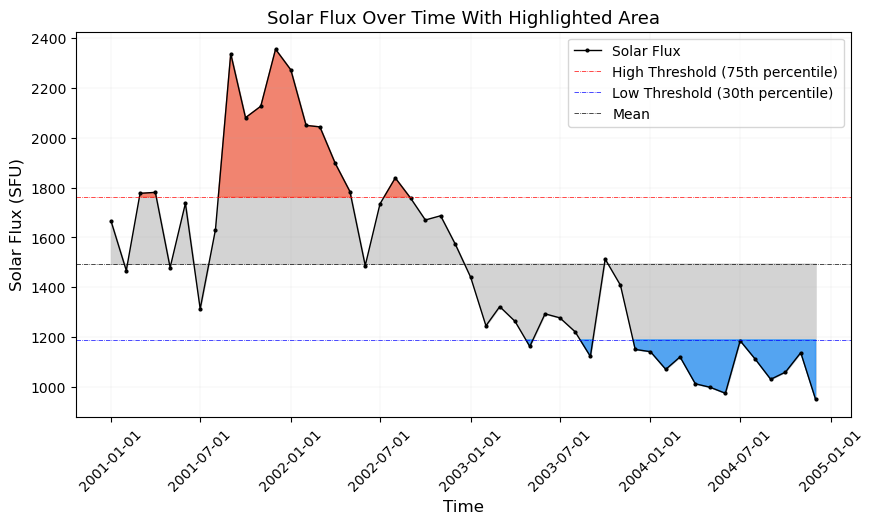

In [15]:
# Assigning Threshold
solar_flux = ds_indices.solar_flux
threshold_high = solar_flux.quantile(0.75)
threshold_low = solar_flux.quantile(0.30)
mean = solar_flux.mean()
print(threshold_high.values, threshold_low.values, mean.values)

plt.figure(figsize=(10, 5))
plt.plot(ds_indices['mpl_time'], ds_indices['solar_flux'], linestyle='-', linewidth=1, marker='o', markersize=2, color='k', label='Solar Flux')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Solar Flux (SFU)', fontsize=12)
plt.title('Solar Flux Over Time With Highlighted Area', fontsize=13)

plt.grid(linewidth=0.09)

# Convert 'mpl_time' for the x-axis.
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

plt.axhline(threshold_high, color='red', linewidth=0.5, linestyle='-.', label='High Threshold (75th percentile)')
plt.axhline(threshold_low,  color='blue', linewidth=0.5, linestyle='-.', label='Low Threshold (30th percentile)')
plt.axhline(mean,  color='black', linewidth=0.5, linestyle='-.', label='Mean')

# 'mpl_time' for the x-axis data in fill_between.
plt.fill_between(ds_indices['mpl_time'], mean, ds_indices['solar_flux'], interpolate=True, color='lightgrey')
plt.fill_between(ds_indices['mpl_time'], threshold_high, ds_indices['solar_flux'], where=(ds_indices['solar_flux'] >= threshold_high), interpolate=True, color='tomato', alpha=0.7)
plt.fill_between(ds_indices['mpl_time'], threshold_low, ds_indices['solar_flux'], where=(ds_indices['solar_flux'] <= threshold_low), interpolate=True, color='dodgerblue', alpha=0.7)

plt.legend()
plt.show()

Text(0.5, 1.0, 'ENSO (Nino 3.4)')

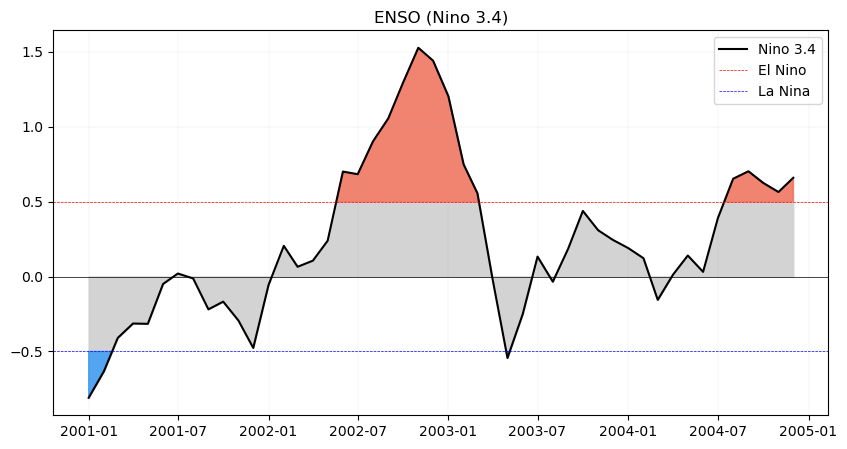

In [17]:
# ENSO
ENSO_threshold_high = 0.5
ENSO_threshold_low = -0.5

# elnino = ds_indices['sst'].where(ds_indices['sst']>=ENSO_threshold_high) 
# lanina = ds_indices['sst'].where(ds_indices['sst']<=ENSO_threshold_low)
# neutral = ds_indices['sst'].where((ds_indices['sst']>-1) & (ds_indices['sst']<1))

plt.figure(figsize=(10, 5))
plt.plot(ds_indices['time'],ds_indices['sst'],'k', label='Nino 3.4')
plt.fill_between(ds_indices['time'].values,ds_indices['sst'],color='lightgray')
# plt.fill_between(ds_indices['time'].values,elnino,y2=1.0, interpolate=True, color='tomato', alpha=0.7)
# plt.fill_between(ds_indices['time'].values,lanina,y2=-1.0, interpolate=True, color='dodgerblue', alpha=0.7)
plt.fill_between(ds_indices['mpl_time'], ENSO_threshold_high, ds_indices['sst'], where=(ds_indices['sst'] >= ENSO_threshold_high), interpolate=True, color='tomato', alpha=0.7) #Mpl time helps edging
plt.fill_between(ds_indices['mpl_time'], ENSO_threshold_low, ds_indices['sst'], where=(ds_indices['sst'] <= ENSO_threshold_low),  interpolate=True, color='dodgerblue', alpha=0.7) 


plt.axhline(0,color='black',linewidth=0.5)
plt.axhline(ENSO_threshold_high,color='red',linewidth=0.5,linestyle='--', label='El Nino')
plt.axhline(ENSO_threshold_low,color='blue',linewidth=0.5,linestyle='--', label='La Nina')
plt.grid(linewidth=0.09)
plt.legend(loc=1)
plt.title("ENSO (Nino 3.4)")

In [18]:
elnino = ds_indices['sst'].where(ds_indices['sst']>=ENSO_threshold_high) 
lanina = ds_indices['sst'].where(ds_indices['sst']<=ENSO_threshold_low)
neutral = ds_indices['sst'].where((ds_indices['sst']>ENSO_threshold_low) & (ds_indices['sst']<ENSO_threshold_high))

In [19]:
print('El Nino: ',elnino.count(dim='time').values)
print('La Nina: ',lanina.count(dim='time').values)
print('Neutral: ',neutral.count(dim='time').values)


counts=[elnino.count(dim='time').values,
        lanina.count(dim='time').values,
        neutral.count(dim='time').values]
print(counts)

El Nino:  15
La Nina:  3
Neutral:  30
[array(15), array(3), array(30)]


In [21]:
# evaporation --> daily
ds_climo = ds.ET_daily.groupby('time.month').mean()
ds_anom = ds.ET_daily.groupby('time.month') - ds_climo

# Resample the daily data to monthly averages
ds_anom_monthly = ds_anom.resample(time='M').mean()
ds_anom_monthly['time']= ds_anom_monthly['time'].values.astype('datetime64[M]')
ds_anom_monthly

<xarray.DataArray 'ET_daily' (time: 48, lat: 3600, lon: 7200)>
dask.array<stack, shape=(48, 3600, 7200), dtype=float32, chunksize=(1, 40, 40), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2001-01-01 2001-02-01 ... 2004-12-01
  * lat      (lat) float64 89.97 89.92 89.88 89.83 ... -89.88 -89.92 -89.97
  * lon      (lon) float64 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0

In [22]:
elnino_evap = ds_anom_monthly.sel(time=elnino.dropna(dim='time')['time']).mean(dim='time')
lanina_evap = ds_anom_monthly.sel(time=lanina.dropna(dim='time')['time']).mean(dim='time')
neutral_evap = ds_anom_monthly.sel(time=neutral.dropna(dim='time')['time']).mean(dim='time')

comp_evap = [elnino_evap,lanina_evap,neutral_evap]
comp_evap

[<xarray.DataArray 'ET_daily' (lat: 3600, lon: 7200)>
 dask.array<mean_agg-aggregate, shape=(3600, 7200), dtype=float32, chunksize=(40, 40), chunktype=numpy.ndarray>
 Coordinates:
   * lat      (lat) float64 89.97 89.92 89.88 89.83 ... -89.88 -89.92 -89.97
   * lon      (lon) float64 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0,
 <xarray.DataArray 'ET_daily' (lat: 3600, lon: 7200)>
 dask.array<mean_agg-aggregate, shape=(3600, 7200), dtype=float32, chunksize=(40, 40), chunktype=numpy.ndarray>
 Coordinates:
   * lat      (lat) float64 89.97 89.92 89.88 89.83 ... -89.88 -89.92 -89.97
   * lon      (lon) float64 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0,
 <xarray.DataArray 'ET_daily' (lat: 3600, lon: 7200)>
 dask.array<mean_agg-aggregate, shape=(3600, 7200), dtype=float32, chunksize=(40, 40), chunktype=numpy.ndarray>
 Coordinates:
   * lat      (lat) float64 89.97 89.92 89.88 89.83 ... -89.88 -89.92 -89.97
   * lon      (lon) float64 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9

Text(0.5, 0.98, 'Composite Evaporation Anomalies during ENSO')

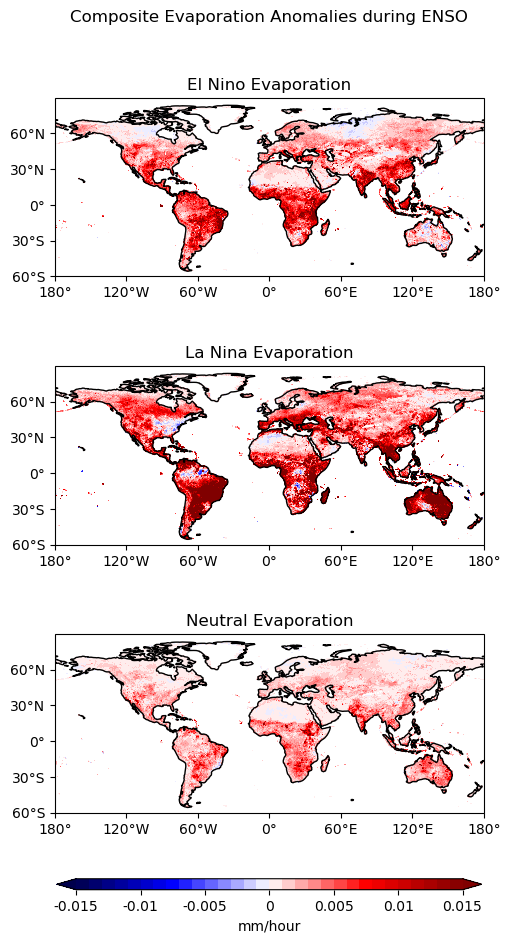

In [23]:
labels=['El Nino Evaporation','La Nina Evaporation', 'Neutral Evaporation']
clevs = np.arange(-0.015, 0.016, 0.001)

fig, axs = plt.subplots(nrows=3,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))

axs = axs.flatten()

#Loop over all of the seasons and plot
for i, evap in enumerate(comp_evap):

        data = comp_evap[i]
        data,lons = add_cyclic_point(data,coord=comp_evap[i]['lon'])

        # Contour plot
        cs=axs[i].contourf(lons,comp_evap[i]['lat'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='seismic',extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,61,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)
        
        axs[i].set_title(labels[i])
        axs[i].coastlines()
        axs[i].set_extent([-180, 180, -60, 90], crs=ccrs.PlateCarree())
        
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Colorbar and title settings
cbar_ax = fig.add_axes([0.25, 0.18, 0.5, 0.01]) # x-position, y-position, width, height
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', ticks=[-0.015, -0.010, -0.005, 0, 0.005, 0.010, 0.015], label='mm/hour')
cbar.set_ticklabels([-0.015, -0.010, -0.005, 0, 0.005, 0.010, 0.015])  # Explicitly set the tick labels for clarity
plt.suptitle('Composite Evaporation Anomalies during ENSO') 